 # Project: Investigate a Dataset - (No-Show appointments of patients-May 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
We have a csv file that contains our data, we need to describe.

### Question(s) for Analysis
 What are the important factors we need to know to predict if the patients are going to show up for their appointment?

In [52]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Assess Data

In [53]:
# To load data in CSV file and print out few lines in my data
app_df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
app_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
# to show any missing values to handle it furthure    
app_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [55]:
# to  explore length of data(number of rows)
len(app_df)

110527

The were 110527 rows in  my data


In [56]:
#to know the shape of data(number of rows and columns)
app_df.shape

(110527, 14)

the data contain 110527 rows with 14 columns 

In [57]:
# to know if there is duplication or not
dup=app_df[app_df.duplicated()]
print(len(dup))

0


there were no duplications in data 

In [58]:
#check if there are duplication in AppointmentID
dup= app_df[app_df.duplicated(['AppointmentID'])]
print(len(dup))

0


there were no duplications in appointment ID`s

In [59]:
#to check for duplication in patien ID
dup=app_df[app_df.duplicated(['PatientId'])]
print(len(dup))
 

48228


There were 48228 duplicated patient-ID`s

In [60]:
#check if there are duplication in petient id and noshow status
dup= app_df[app_df.duplicated(['No-show','PatientId'])]
print(len(dup))


38710


There were 38710 duplicated patient ids with the same status (show or no show )

In [61]:
# to know if there are unique values in patients IDs
app_df['PatientId'].nunique()


62299

There were 48228 repeated Patients's ID , only `62299 `were unique patient's ID

In [62]:
#to get informations about our data (describtion)
app_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [63]:
#to detect location of Age with value -1 :
app_df.loc[app_df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Data Cleaning
After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section

In [64]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [65]:
# to remove Age with value -1:
app_df.drop(index=99832,inplace=True)
app_df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [66]:
# to correct names of columns and  then check  on it:
app_df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
app_df.rename(columns={'SMS_received':'SMSreceived'},inplace=True)
app_df.rename(columns={'No-show':'Noshow'},inplace=True)
app_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
#remove the duplication data of patientID and Noshow status and check no. of rows after remove duplications

app_df.drop_duplicates(['PatientId','Noshow'],inplace=True)
len(app_df)

71816

Duplications were removed and data excluded to 71816 after were 110572

In [68]:
#remove unimportant data
app_df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
app_df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No



 # Conclusion of Data wrangling

 After collecting the data we explore the first rows of data and check the dimensions of data and check if there are any duplication and unnecessary data need to be removed .then in cleaning section , we modify the name of columns and drop any useless informations.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section

### Common features(general View)

In [69]:
# sea.set_style('darkgrid') #set theme style of seaborn grid
sea.set_theme(style="dark", palette=None)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

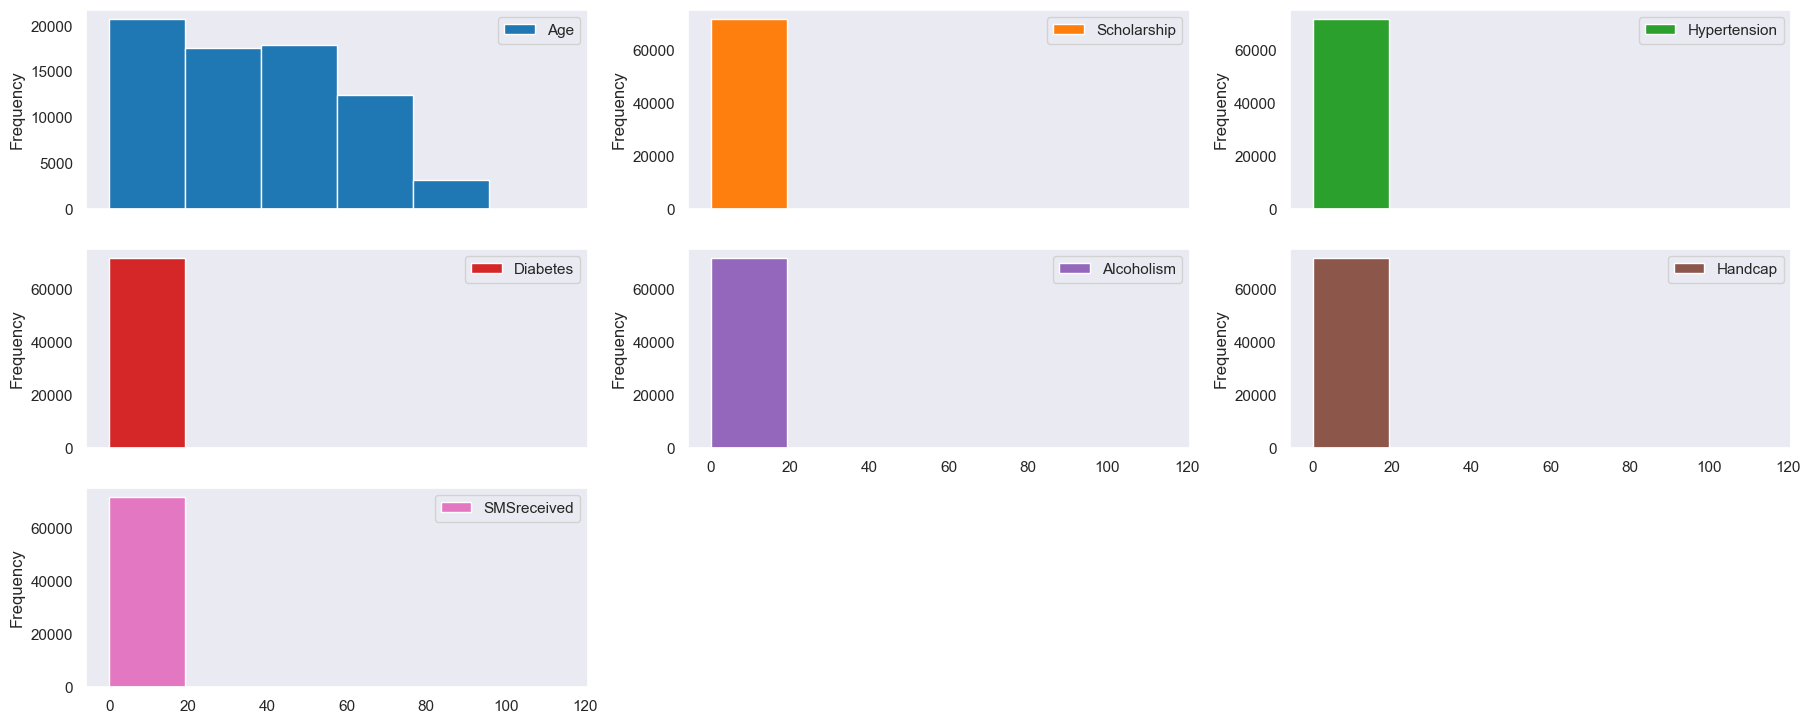

In [70]:
app_df.plot(kind ='hist',subplots=True,layout = (5,3), bins=6,figsize=(22,15) )

we observe variation in Age stages for patients while other remaining items show low varition with high count number

In [71]:
#to know the count number of attended patients
Presence=app_df[app_df.Noshow=='No']
non_Presence=app_df[app_df.Noshow=='Yes']
Presence.count(),Presence.mean(),non_Presence.count(),non_Presence.mean()


C:\Users\dell\AppData\Local\Temp\ipykernel_14000\489702095.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Presence.count(),Presence.mean(),non_Presence.count(),non_Presence.mean()
C:\Users\dell\AppData\Local\Temp\ipykernel_14000\489702095.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Presence.count(),Presence.mean(),non_Presence.count(),non_Presence.mean()


(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMSreceived      54153
 Noshow           54153
 dtype: int64,
 Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMSreceived      0.297232
 dtype: float64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMSreceived      17663
 Noshow           17663
 dtype: int64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMSreceived      0.453094
 dtype: float64)

In [72]:
## Function for [Presence]:

def Presence_comparison(data_type,x_var,y_var,hue_var,color_var,title,x_label,y_label,legend,plot_type):

    if (plot_type == 'count_plot'):     #for count_plot
        sea.countplot(data=data_type,x=x_var,color=color_var,edgecolor='black')

        
    elif( plot_type == 'count_plot_hue'):  #for count_plot has hue variable
        sea.countplot(data=data_type, x=x_var, hue=hue_var, color=color_var,edgecolor='black')


    elif (plot_type == 'hist_plot'):    #for hist_plot
        sea.histplot(data=data_type,x=x_var,color=color_var,edgecolor='black')


    elif (plot_type == 'hist_plot_y'):   #for hist_plot with y variable
        sea.histplot(data=data_type,x=x_var,y=y_var,color=color_var,edgecolor='black')

    elif (plot_type == 'hist_plot_hue'):          #for hist_plot with hue variable
        sea.histplot(data=data_type,x=x_var,hue=hue_var,color=color_var,edgecolor='black')
 
    elif (plot_type == 'bar_plot'):    # for bar_plot
        sea.barplot(data=data_type,x=x_var,y=y_var,color=color_var,edgecolor='black')

     
    if legend != '':               # condition for legend 
        plt.legend(labels=[legend]);
       
    if (x_label=='Neighbourhood'):   # condition for xlabel 
        plt.xticks(rotation = 90);
    
    plt.title(title,size=16,fontweight='bold')
    plt.xlabel(x_label,size=14)
    plt.ylabel(y_label,size=14)
    plt.show()


In [73]:
## Function for [non_Presence]:

def non_Presence_comparison(data_type,x_var,y_var,hue_var,color_var,title,x_label,y_label,legend,plot_type):

    if (plot_type == 'count_plot'):              #for count_plot
        sea.countplot(data=data_type,x=x_var,color=color_var,edgecolor='black')
         
    elif( plot_type == 'count_plot_hue'):        #for count_plot with hue variable
        sea.countplot(data=data_type, x=x_var, hue=hue_var, color=color_var,edgecolor='black')

    elif (plot_type == 'hist_plot'):             #for hist_plot  
        sea.histplot(data=data_type,x=x_var,color=color_var,edgecolor='black')


    elif (plot_type == 'hist_plot_y'):          #for hist_plot with y variable
        sea.histplot(data=data_type,x=x_var,y=y_var,color=color_var,edgecolor='black')
        
    elif (plot_type == 'hist_plot_hue'):          #for hist_plot with hue variable
        sea.histplot(data=data_type,x=x_var,hue=hue_var,color=color_var,edgecolor='black')


    elif (plot_type == 'bar_plot'):              #for bar_plot 
        sea.barplot(data=data_type,x=x_var,y=y_var,color=color_var,edgecolor='black')

        
    if legend != '':                 # condition for legend 
        plt.legend(labels=[legend]);
    
    if (x_label=='Neighbourhood'):    #condition for xlabel
        plt.xticks(rotation = 90)
        
    plt.title(title,size=16,fontweight='bold')
    plt.xlabel(x_label,size=10)
    plt.ylabel(y_label,size=14)
    plt.show()


In [74]:
## Functions for [Presence /non_Presence]:

def Presence_non_Presence_comparison(data_type1,data_type2,x_var,y_var,hue_var,color_var1,color_var2,title,x_label,y_label,legend1,legend2,plot_type):
    
    if (plot_type == 'count_plot'):          #for count_plot
        sea.countplot(data=data_type1,x=x_var,color=color_var1,edgecolor='black')
        sea.countplot(data=data_type2,x=x_var,color=color_var2,edgecolor='black')
        
    elif( plot_type == 'count_plot_hue'):    #for count_plot with hue variable
        sea.countplot(data=data_type1, x=x_var, hue=hue_var, color=color_var1,edgecolor='black')
        sea.countplot(data=data_type2, x=x_var, hue=hue_var, color=color_var2,edgecolor='black')
  
    elif (plot_type == 'hist_plot'):           #for hist_plot  
        sea.histplot(data=data_type1,x=x_var,color=color_var1,edgecolor='black')
        sea.histplot(data=data_type2,x=x_var,color=color_var2,edgecolor='black')

    elif (plot_type == 'hist_plot_y'):          #for hist_plot with y variable
        sea.histplot(data=data_type1,x=x_var,y=y_var,color=color_var1,edgecolor='black')
        sea.histplot(data=data_type2,x=x_var,y=y_var,color=color_var2,edgecolor='black')

    elif (plot_type == 'hist_plot_hue'):          #for hist_plot with hue variable
        sea.histplot(data=data_type1,x=x_var,hue=hue_var,color=color_var1,edgecolor='black')
        sea.histplot(data=data_type2,x=x_var,hue=hue_var,color=color_var2,edgecolor='black')


    elif (plot_type == 'bar_plot'):             #for bar_plot
        sea.barplot(data=data_type1,x=x_var,y=y_var,color=color_var1,edgecolor='black')
        sea.barplot(data=data_type2,x=x_var,y=y_var,color=color_var2,edgecolor='black')

    if (legend1 != '') and (legend2 != ''):      # condition for legend 
        plt.legend(labels=[legend1,legend2])
   
    if (x_label=='Neighbourhood'):               #condition for xlabel
        plt.xticks(rotation = 90);

    plt.title(title,size=16,fontweight='bold')
    plt.title(title,size=16,fontweight='bold')
    plt.xlabel(x_label,size=14)
    plt.ylabel(y_label,size=14)
    plt.show()


### What Factors affect on Presence?  
### -Comparing Presence/non-Presence with different variables

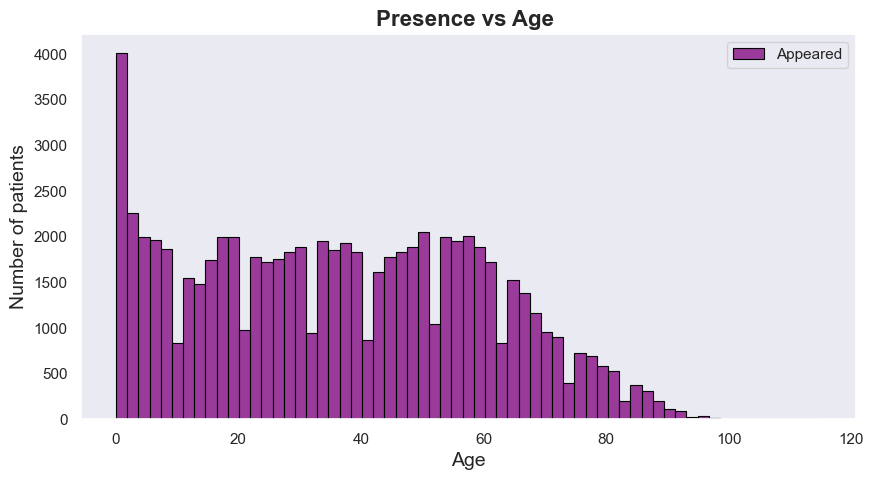

In [75]:
#to know no. of (attended) patients by using Age
plt.figure(figsize=(10,5))#setting fig.size
Presence_comparison(app_df,
                     'Age',
                     'Noshow',
                     '',
                     'Purple',
                     "Presence vs Age ",
                     "Age",
                     "Number of patients",
                     'Appeared',
                     'hist_plot')

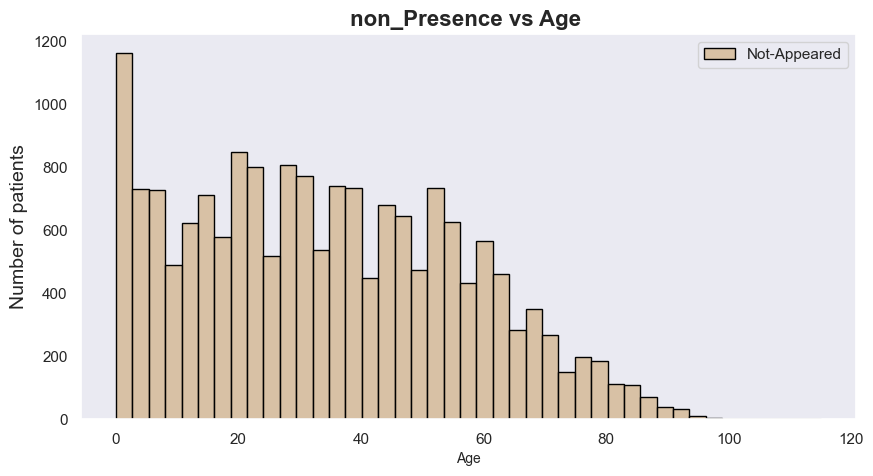

In [76]:
#to know no. of (non-attended) patients by using Age
plt.figure(figsize=(10,5))#setting fig.size
non_Presence_comparison(non_Presence,
                        'Age',
                        '',
                        '',
                        'tan',
                        "non_Presence vs Age ",
                        "Age",
                        "Number of patients",
                        'Not-Appeared',
                        'hist_plot')

number of attended patients (Appeared) was more than who do not attend (No Appeared) with high age value of children who, definitely, come with their parents.

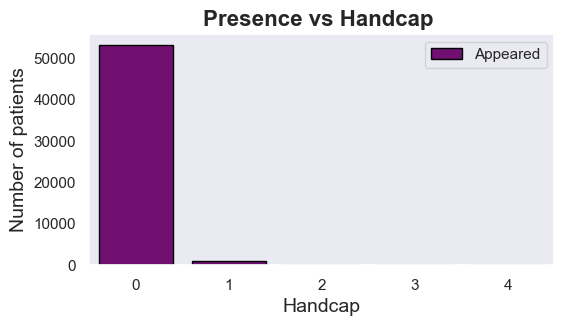

In [77]:
#to know no. of attended patients related to using Handcap:

plt.figure(figsize=(6,3))#setting fig.size

Presence_comparison(Presence,
                    'Handcap',
                    '',
                    '',
                    'purple',
                    "Presence vs Handcap ",
                    "Handcap",
                    "Number of patients",
                    'Appeared',
                    "count_plot")



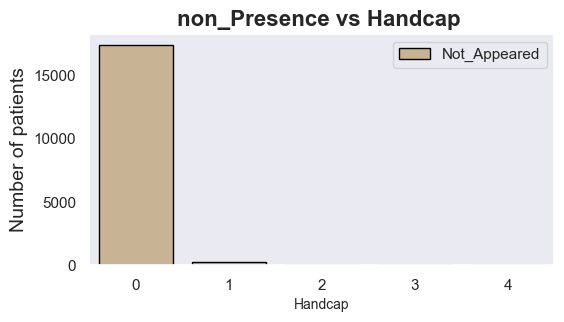

In [78]:
# to know no. of non_attended patients related to Handcap:

plt.figure(figsize=(6,3))#setting fig.size

non_Presence_comparison(non_Presence,
                    'Handcap',
                    '',
                    '',
                    'tan',
                    "non_Presence vs Handcap ",
                    "Handcap",
                    "Number of patients",
                    'Not_Appeared',
                    "count_plot")

Patients with handcap problems show lower attendance

In [79]:
# to convert no_show column from yes/no to 1/0
app_df.Noshow = app_df.Noshow.map(dict(Yes=1, No=0))


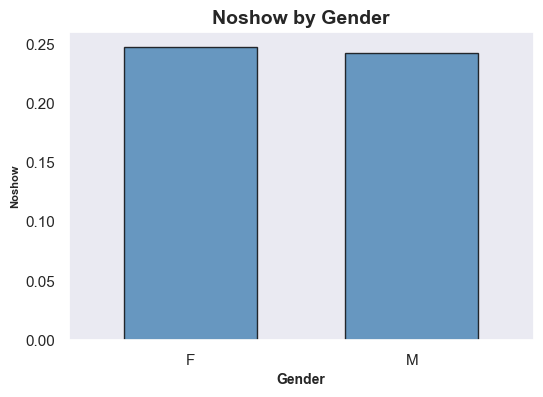

In [80]:
#to know mean of both Genders in Noshow:
plt.figure(figsize=(20,3))#setting fig.size
def myGroPlot(app_df, grpvar, yVar):

   app_df.groupby("Gender")['Noshow'].mean().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='steelblue', alpha=0.8)

   plt.title('Noshow by Gender', fontsize = 14, weight = "bold")
   plt.xlabel('Gender', fontsize =10, weight = "bold")
   plt.ylabel('Noshow', fontsize = 8, weight='bold');
myGroPlot(app_df,'Gender','Noshow')

The mean relative frequencies  of Genders(Males, Females) show almost the same values to each other, which means that the attendance/non_attendance rate doesn`t depend mainly on Gender.

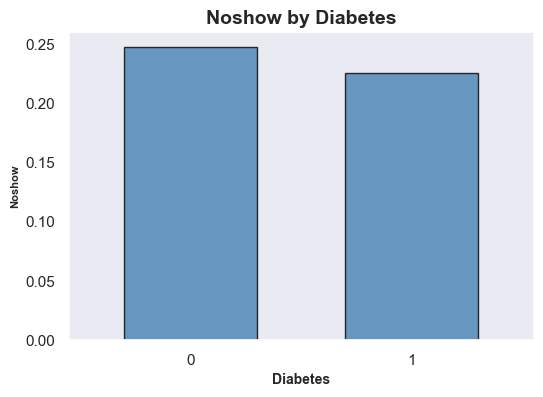

In [81]:
#to know mean of Diabetic patients in Noshow:
plt.figure(figsize=(20,3))#setting fig.size
def myGroPlot(app_df, grpvar, yVar):

   app_df.groupby("Diabetes")['Noshow'].mean().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='steelblue', alpha=0.8)

   plt.title('Noshow by Diabetes', fontsize = 14, weight = "bold")
   plt.xlabel('Diabetes', fontsize =10, weight = "bold")
   plt.ylabel('Noshow', fontsize = 8, weight='bold');
myGroPlot(app_df,'Diabetes','Noshow')

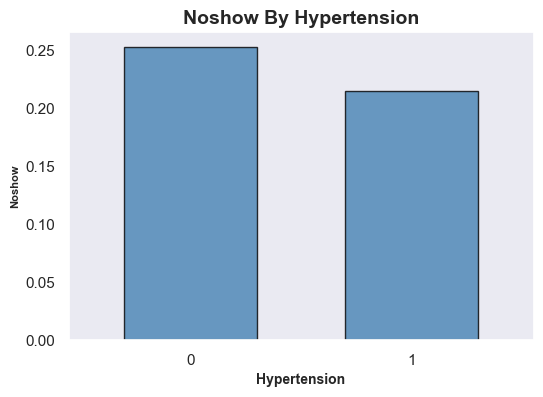

In [82]:
#to know mean of Hypertensive patients in Noshow:
plt.figure(figsize=(20,3))#setting fig.size
def myGroPlot(app_df, grpvar, yVar):

   app_df.groupby("Hypertension")['Noshow'].mean().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='steelblue', alpha=0.8)

   plt.title('Noshow by Hypertension'.title(), fontsize = 14, weight = "bold")
   plt.xlabel('Hypertension', fontsize =10, weight = "bold")
   plt.ylabel('Noshow', fontsize = 8, weight='bold');
myGroPlot(app_df,'Hypertension','Noshow')

patients who have chronic diseases (Diabetes and Hypertension) show low attendance than non-chronic patients

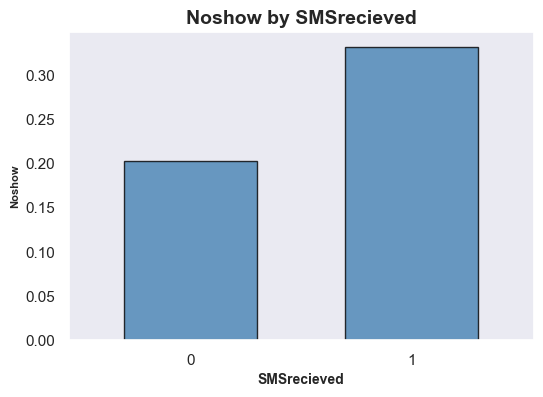

In [83]:
#to know mean of SMS-recieved in Noshow:
plt.figure(figsize=(20,3))#setting fig.size
def myGroPlot(app_df, grpvar, yVar):

   app_df.groupby("SMSreceived")['Noshow'].mean().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='steelblue', alpha=0.8)

   plt.title('Noshow by SMSrecieved', fontsize = 14, weight = "bold")
   plt.xlabel('SMSrecieved', fontsize =10, weight = "bold")
   plt.ylabel('Noshow', fontsize = 8, weight='bold');
myGroPlot(app_df,'SMSrecieved','Noshow')

Patients who Receive SMS show higher attendance than who do not recieve SMS.

## -Does Neighbourhood affect Showing up for Appointments?



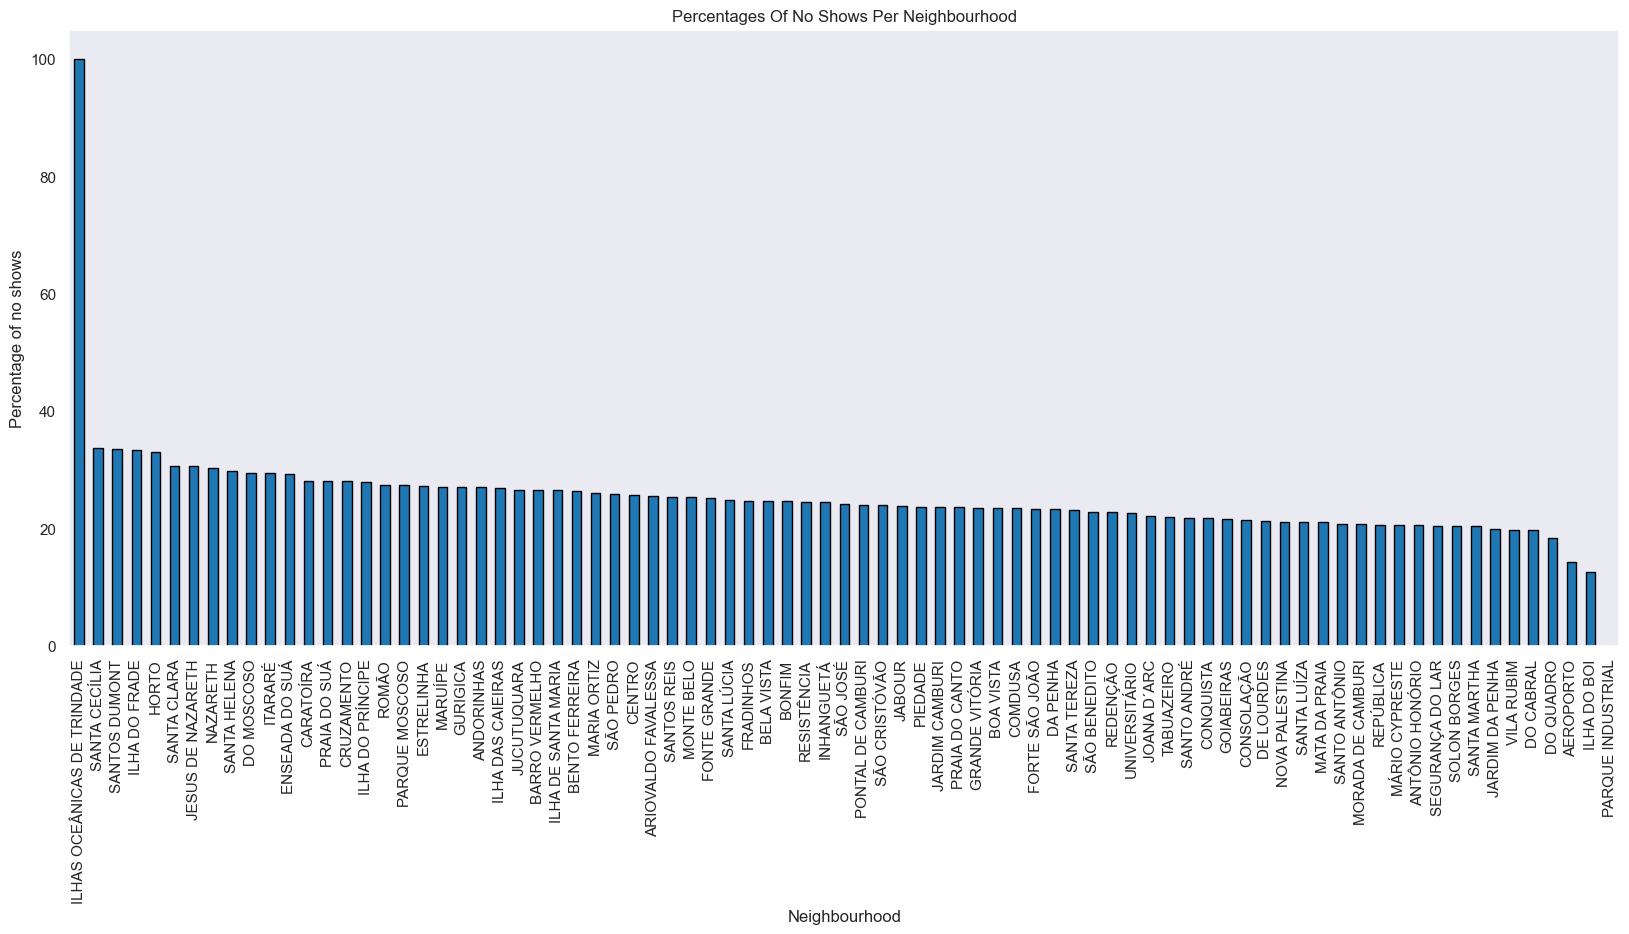

In [84]:
# Investigating neighbourhoods exlusively in regards to show or no shows
hoods_no_show= non_Presence.groupby(['Neighbourhood']).count()['Noshow']
hoods = app_df.groupby(['Neighbourhood']).count()['Noshow']
hoods_show = Presence.groupby(['Neighbourhood']).count()['Noshow']

percentages_no_show = hoods_no_show/hoods*100
percentages_no_show.sort_values()

# Plotting percentages of no_shows per neighbourhood
percentages_no_show.sort_values(ascending=False).plot(kind='bar',edgecolor='black',title='Percentages of No shows per Neighbourhood'.title(), figsize=(20,8));
plt.ylabel('Percentage of no_shows'.replace("_"," "))
plt.xlabel('Neighbourhood');

ILHAS OCEAN OSCEANICAS DE TRINDADE show the lowest attandance rate where PARQUE INDUSTRIAL show the highest attendance rate 

### Comparing two variables with each other regarding to Presence/non_Presence:

Patients who do not recieving SMS show higher Presence ,However Females show higher Presence than males 

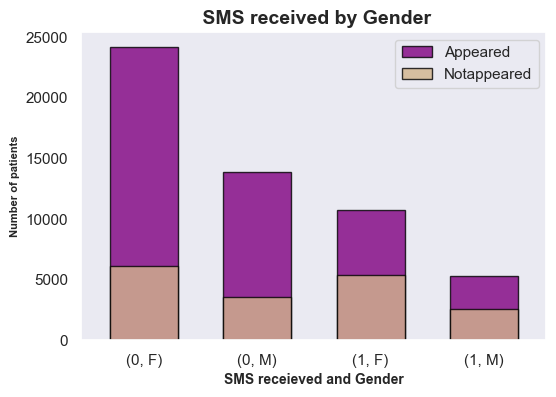

In [85]:
#to know if Sms-Recieved and Gender have influance on attendance:
def myGroPlot(app_df, grpvar,yVar):

  Presence.groupby("SMSreceived")['Gender'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
  non_Presence.groupby("SMSreceived")['Gender'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='tan', alpha=0.8)

  plt.legend(labels=['Appeared','Notappeared'])
  plt.title(' SMS received by Gender', fontsize = 14, weight = "bold")
  plt.xlabel('SMS receieved and Gender', fontsize =10, weight = "bold")
  plt.ylabel('Number of patients', fontsize = 8, weight='bold');
myGroPlot(app_df,'SMSrecieved','Gender')

Patients (Females and Males) who doesn`t receive SMS show higher attendance than who recieve SMS, However , in general,Females show higher attandance than males.

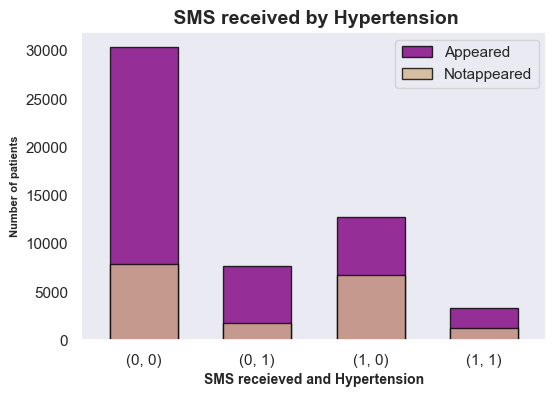

In [86]:
#to know if Sms-Recieved and hypertension have influance on attendance:
def myGroPlot(app_df, grpvar,yVar):

  Presence.groupby("SMSreceived")['Hypertension'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
  non_Presence.groupby("SMSreceived")['Hypertension'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='tan', alpha=0.8)

  plt.legend(labels=['Appeared','Notappeared'])
  plt.title(' SMS received by Hypertension', fontsize = 14, weight = "bold")
  plt.xlabel('SMS receieved and Hypertension', fontsize =10, weight = "bold")
  plt.ylabel('Number of patients', fontsize = 8, weight='bold');
myGroPlot(app_df,'SMSrecieved','Hypertension')

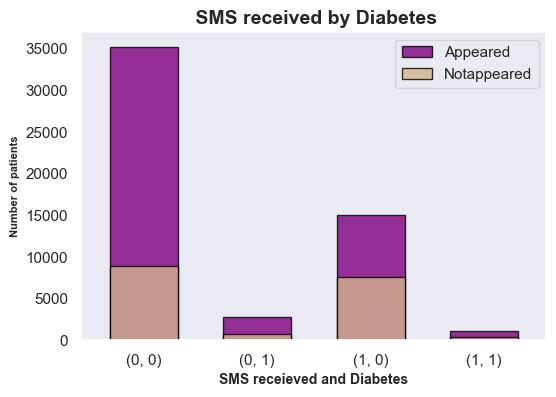

In [87]:
#to know if SMS receieved and Diabetes affect on attandance rate:
def myGroPlot(app_df, grpvar,yVar):

  Presence.groupby("SMSreceived")['Diabetes'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
  non_Presence.groupby("SMSreceived")['Diabetes'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='tan', alpha=0.8)

  plt.legend(labels=['Appeared','Notappeared'])
  plt.title(' SMS received by Diabetes', fontsize = 14, weight = "bold")
  plt.xlabel('SMS receieved and Diabetes', fontsize =10, weight = "bold")
  plt.ylabel('Number of patients', fontsize = 8, weight='bold');
myGroPlot(app_df,'SMSrecieved','Diabetes')

Patients (Females and Males) who doesn`t receive SMS and without chronic diseases show higher attendance than others.

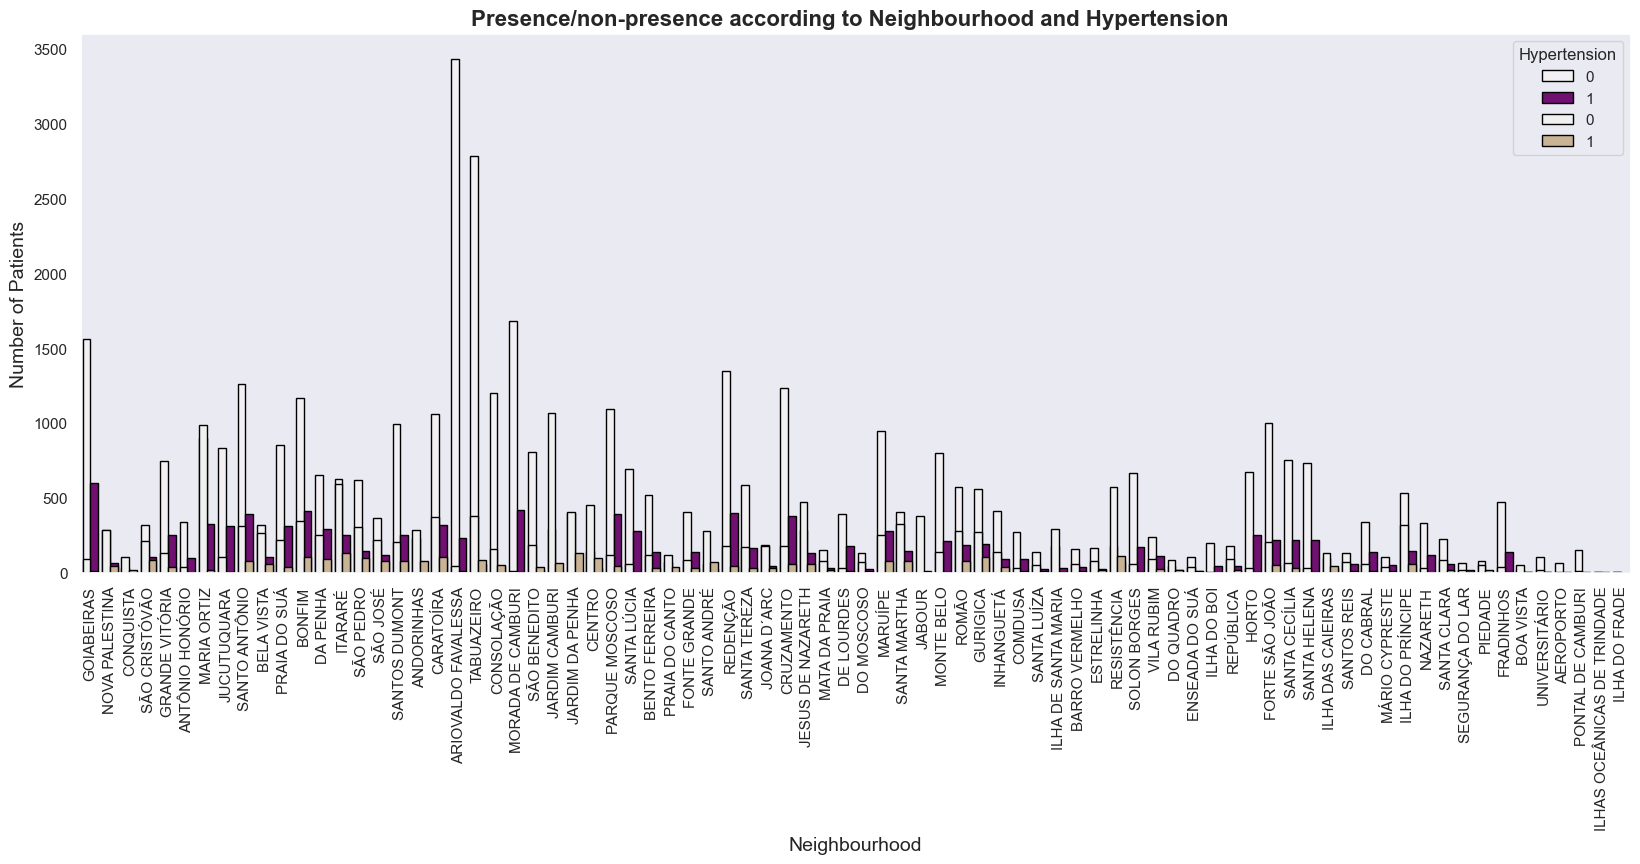

In [88]:
# to know attended/non-attended patients related to Hypertension and Neighbourhood
plt.figure(figsize=(20,7))#setting fig.size
Presence_non_Presence_comparison(Presence,
                                 non_Presence,
                                 'Neighbourhood',
                                 "",
                                 'Hypertension',
                                 'purple',
                                 'tan',
                                 "Presence/non-presence according to Neighbourhood and Hypertension  ",
                                 "Neighbourhood",
                                 "Number of Patients",
                                 "",
                                 "",
                                 'count_plot_hue')

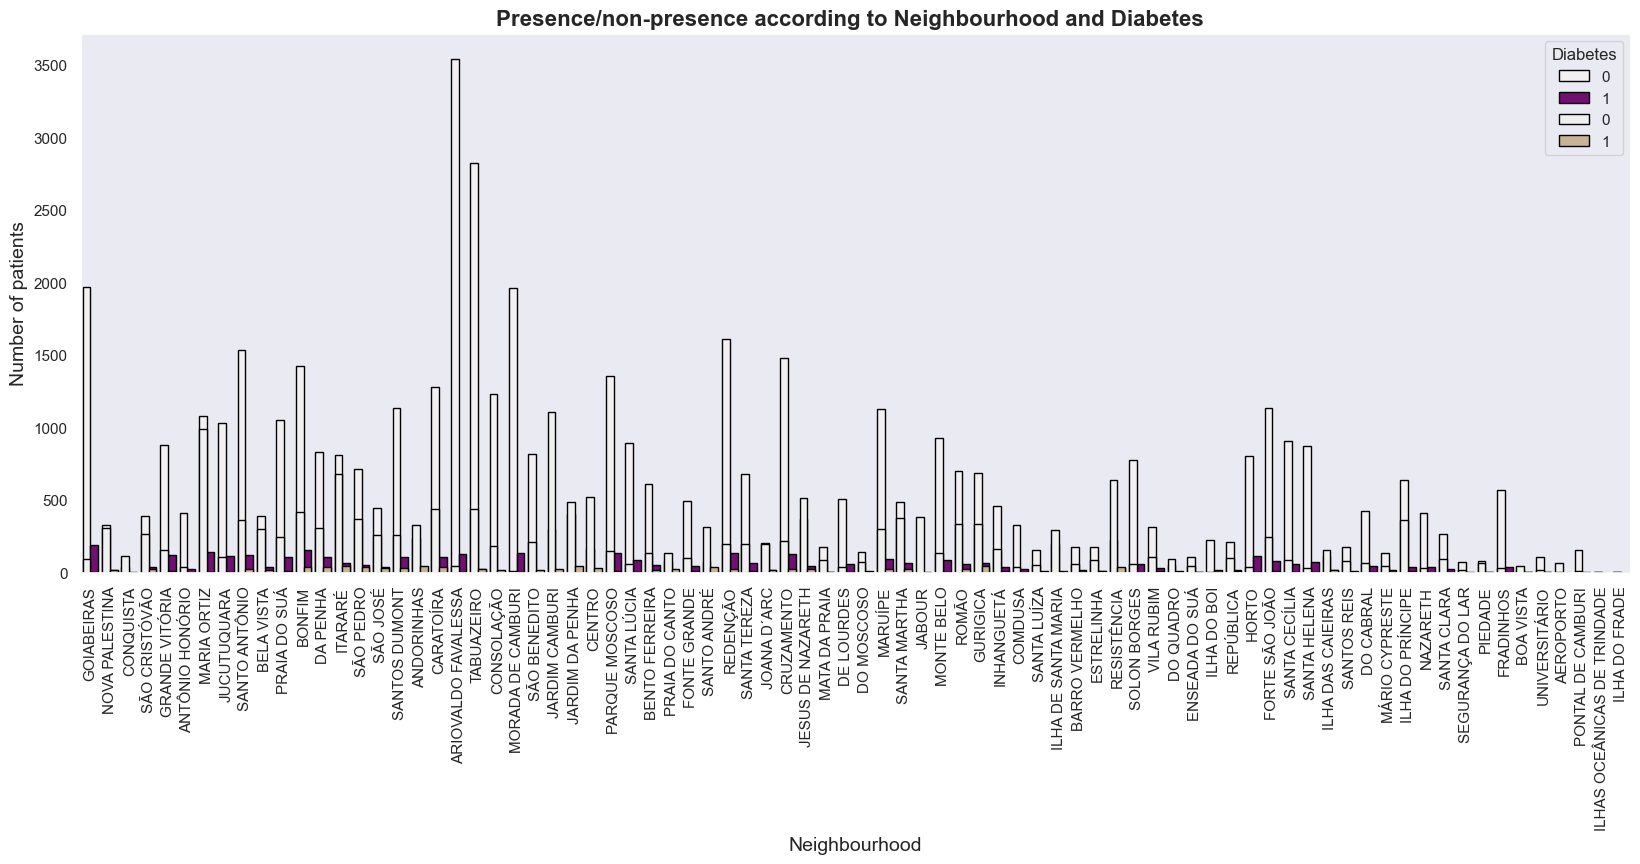

In [89]:
# to know attended/non-attended patients related to Diabetes and Neighbourhood
plt.figure(figsize=(20,7))#setting fig.size
Presence_non_Presence_comparison(Presence,
                                 non_Presence,
                                 'Neighbourhood',
                                 "",
                                 'Diabetes',
                                 'purple',
                                 'tan',
                                 "Presence/non-presence according to Neighbourhood and Diabetes  ",
                                 "Neighbourhood",
                                 "Number of patients",
                                 "",
                                 "",
                                 'count_plot_hue')

  ARIOVALDO FAVALESSA shows the highest attendance with the lower chronic disease while GOIABEIRAS has the highest chronic disease patients(Hypertension and Diabetes) with low attendance.

In [90]:
Presence.groupby("Gender").Age.describe(),non_Presence.groupby("Gender").Age.describe()


(          count       mean        std  min   25%   50%   75%    max
 Gender                                                             
 F       34960.0  39.130292  22.757323  0.0  21.0  39.0  57.0  115.0
 M       19193.0  33.766269  24.985462  0.0  10.0  32.0  55.0  100.0,
           count      mean        std  min   25%   50%   75%    max
 Gender                                                            
 F       11506.0  36.06501  21.408608  0.0  20.0  34.0  52.0  115.0
 M        6157.0  31.22040  23.263980  0.0  10.0  29.0  50.0   97.0)

Females show the highest attendance than males with a higher mean. However, there were no significant differences in the mean between them.

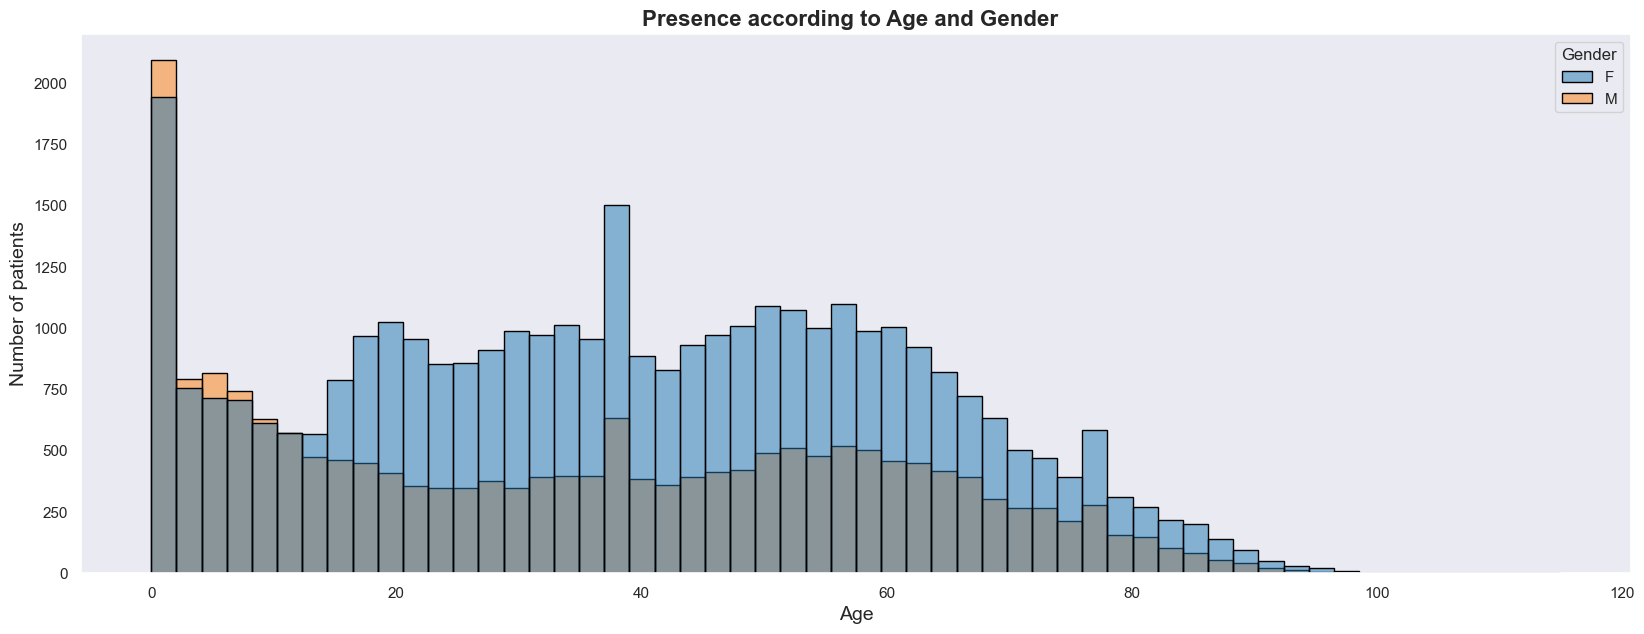

In [91]:
# to know attended and non-attended patients related to Age and Gender
plt.figure(figsize=(20,7))#setting fig.size
Presence_comparison(Presence,
                    'Age',
                     '',
                    "Gender",
                    "",
                     "Presence according to Age and Gender  ",
                     "Age",
                     "Number of patients",
                      "",
                     'hist_plot_hue')

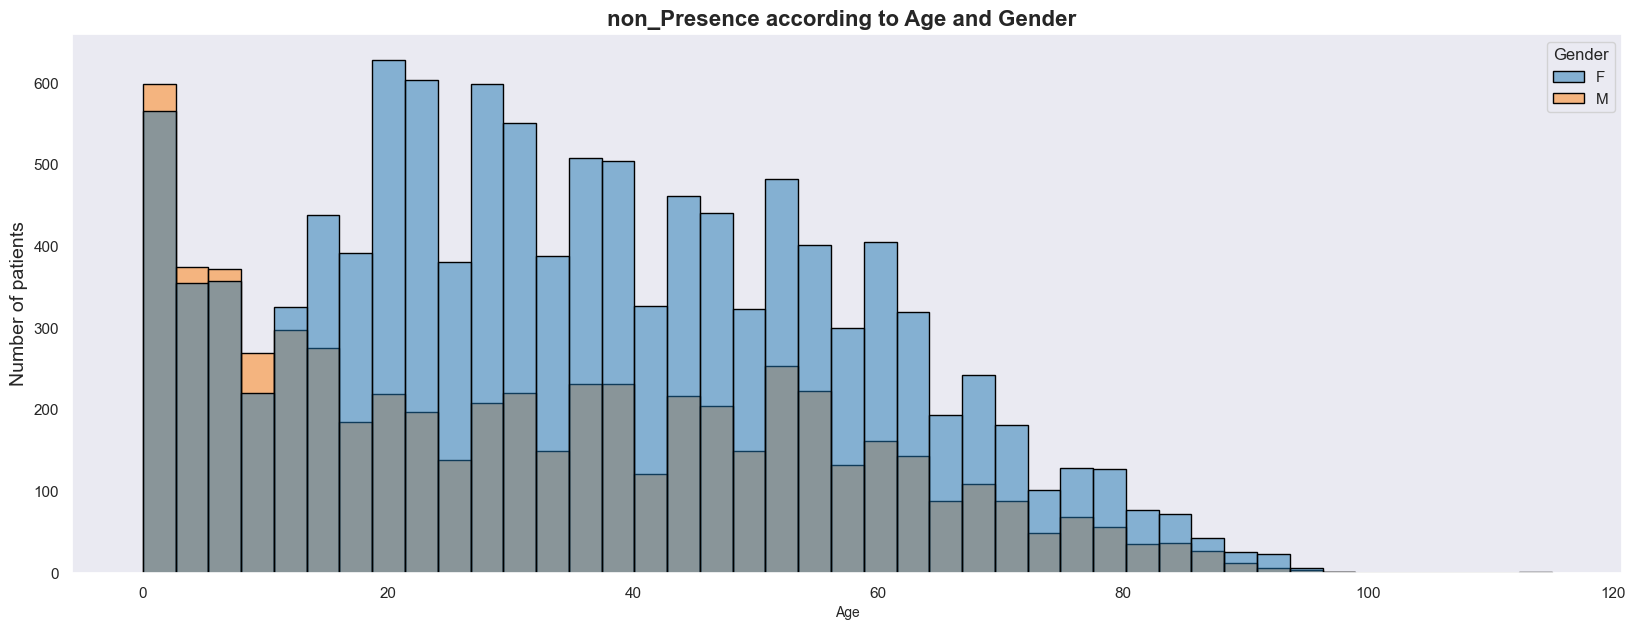

In [92]:
# to know non-attended patients related to Age and Gender
plt.figure(figsize=(20,7))#setting fig.size
non_Presence_comparison(non_Presence,
                        'Age',
                        '',
                        "Gender",
                        '',
                        "non_Presence according to Age and Gender  ",
                        "Age",
                        "Number of patients",
                        "",
                        'hist_plot_hue')

However, Baby boys were more attended than baby girls, Older patients show low attendance especially after 60yrs old.

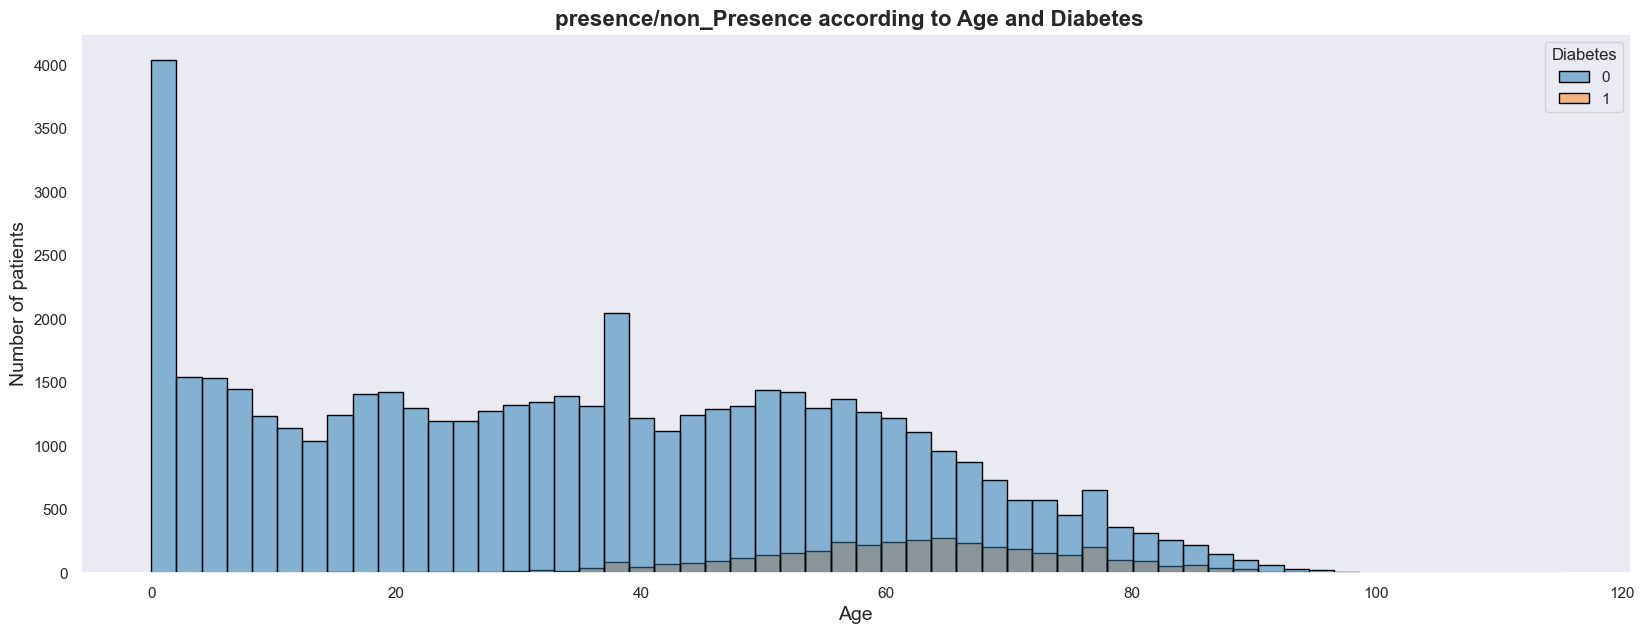

In [93]:
# to know attended and non-attended patients related to Age and Diabetes
plt.figure(figsize=(20,7))#setting fig.size
Presence_comparison(Presence,
                                'Age',
                                 '',
                                 "Diabetes",
                                 '',
                                 "presence/non_Presence according to Age and Diabetes  ",
                                 "Age",
                                 "Number of patients",
                                 "",
                                'hist_plot_hue')

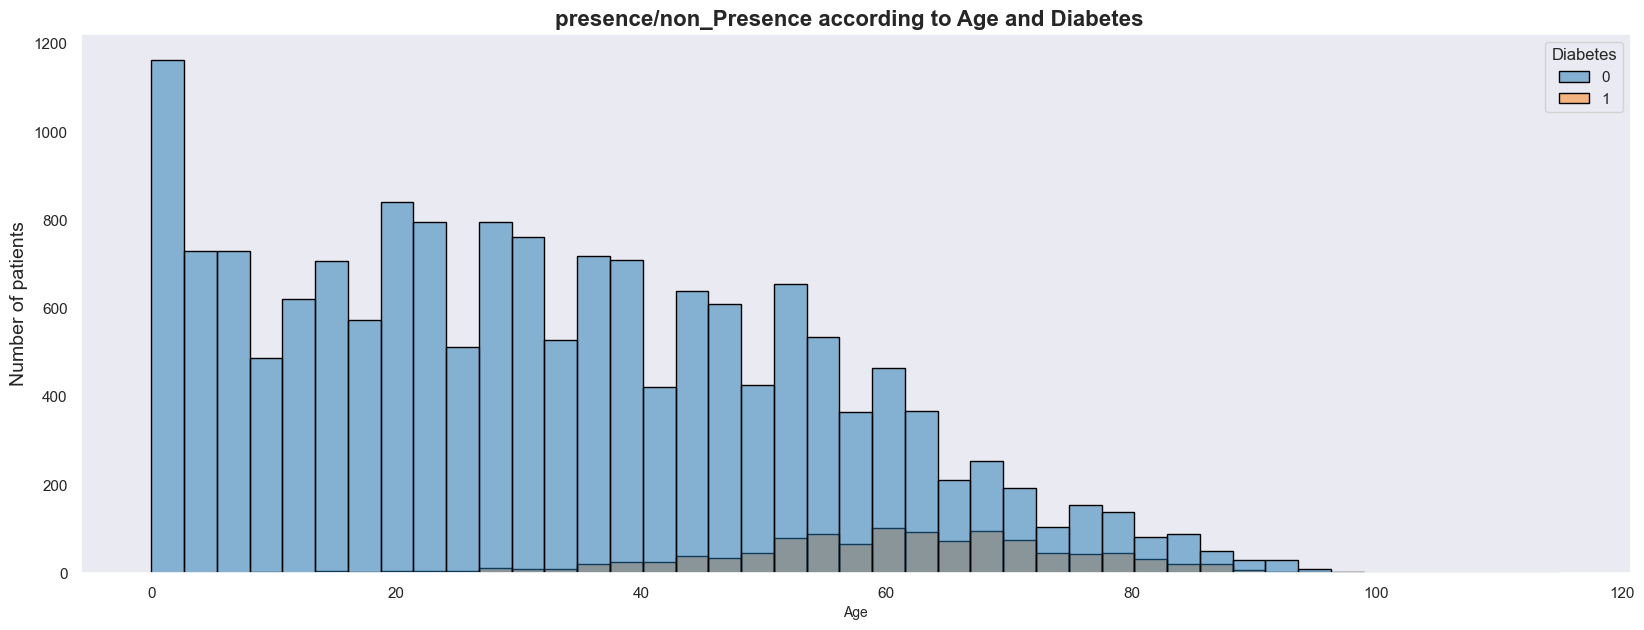

In [94]:
# to know attended and non-attended patients related to Age and Diabetes
plt.figure(figsize=(20,7))#setting fig.size
non_Presence_comparison(non_Presence,
                        'Age',
                         '',
                         "Diabetes",
                         '',
                         "presence/non_Presence according to Age and Diabetes  ",
                         "Age",
                         "Number of patients",
                          "",
                         'hist_plot_hue')

Chronic diseases increase in patients in age around 40 to above 80 and attandance rate decrease in non_chronic patients.

In [95]:
non_Presence.groupby(["Hypertension","Diabetes"]).mean()['Age'],Presence.groupby(["Hypertension","Diabetes"]).mean()['Age']


C:\Users\dell\AppData\Local\Temp\ipykernel_14000\3815356829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_Presence.groupby(["Hypertension","Diabetes"]).mean()['Age'],Presence.groupby(["Hypertension","Diabetes"]).mean()['Age']
C:\Users\dell\AppData\Local\Temp\ipykernel_14000\3815356829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_Presence.groupby(["Hypertension","Diabetes"]).mean()['Age'],Presence.groupby(["Hypertension","Diabetes"]).mean()['Age']


(Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64)

older patients were valunerable to chronic diseases than younger one.
show patients with non chronic diseases were having a mean-age around 31 but Diabties-Hypertensive patients were with mean ages around 64 years old , while non-show patients with non chronic diseases were having a mean-age around 29 but Diabties-Hypertensive patients were with mean ages around 63 years old. overall, there were a correlation between age and diseases and there were no corrleation between chronic disease and Presence rate.

As patients get older, they become more vulnerable to Hypertension and Diabetes until reach an age range from 64 to 66 years old.

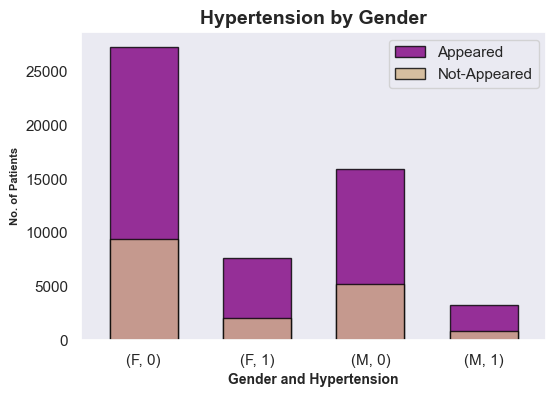

In [96]:
#Does Hypertension affects on attended and attended/non_attended Genders?
def myGroPlot(app_df, grpvar, yVar):

    Presence.groupby(["Gender"])['Hypertension'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
    non_Presence.groupby(["Gender"])['Hypertension'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0,width=0.6, color='tan', alpha=0.8)
        
    plt.legend(labels=['Appeared','Not-Appeared'])
    plt.title('Hypertension by Gender', fontsize = 14, weight = "bold")
    plt.xlabel('Gender and Hypertension', fontsize =10, weight = "bold")
    plt.ylabel('No. of Patients', fontsize = 8, weight='bold');
myGroPlot(app_df,'Hypertension','Mean of Age')

Non_Hypertensive Female and male Patients sjow higher attandance than hypertensive patients.

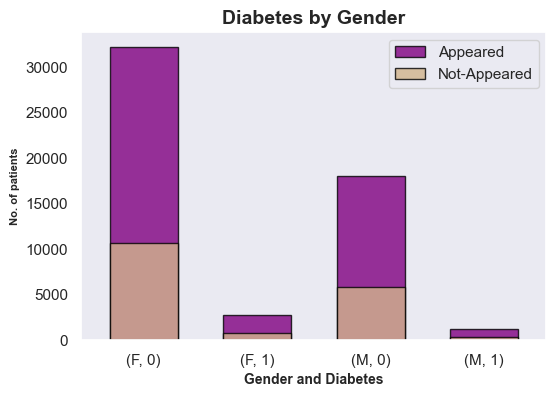

In [97]:
#Does Diabetes affects on attended and attended/non_attended Genders?

def myGroPlot(app_df, grpvar, yVar):

    Presence.groupby(["Gender"])['Diabetes'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
    non_Presence.groupby(["Gender"])['Diabetes'].value_counts().plot.bar(edgecolor='black', figsize=(6,4),rot=0,width=0.6, color='tan', alpha=0.8)
        
    plt.legend(labels=['Appeared','Not-Appeared'])
    plt.title('Diabetes by Gender', fontsize = 14, weight = "bold")
    plt.xlabel('Gender and Diabetes', fontsize =10, weight = "bold")
    plt.ylabel('No. of patients', fontsize = 8, weight='bold');
myGroPlot(app_df,'Diabetes','Mean of Age')

Non_Diabetic Female and male Patients show higher attandance than Diabetic patients.
Overall,Females show higher attendance than males with higher chronic diseases (Hypertension,Diabetes) ,However in both sexes,especially Females without chronic diseases show the highest attendance rate.

C:\Users\dell\AppData\Local\Temp\ipykernel_14000\3952521434.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Presence.groupby(["Diabetes"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
C:\Users\dell\AppData\Local\Temp\ipykernel_14000\3952521434.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_Presence.groupby(["Diabetes"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0,width=0.6, color='tan', alpha=0.8)


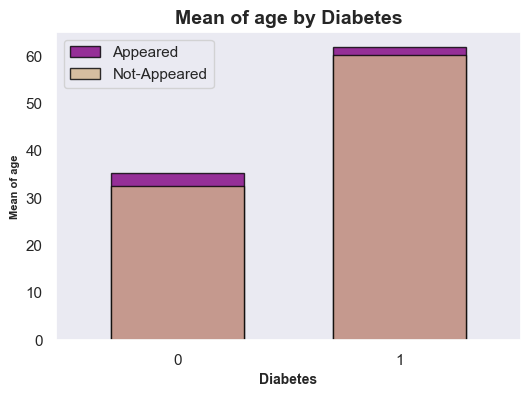

In [98]:
#Does Age affects on attended and attended/non_attended Diabetic patients?

def myGroPlot(app_df, grpvar, yVar):
    Presence.groupby(["Diabetes"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
    non_Presence.groupby(["Diabetes"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0,width=0.6, color='tan', alpha=0.8)
    plt.legend(labels=['Appeared','Not-Appeared'])
    plt.title('Mean of age by Diabetes', fontsize = 14, weight = "bold")
    plt.xlabel('Diabetes', fontsize =10, weight = "bold")
    plt.ylabel('Mean of age', fontsize = 8, weight='bold');
myGroPlot(app_df,'Diabetes','Mean of Age')

C:\Users\dell\AppData\Local\Temp\ipykernel_14000\1993429520.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Presence.groupby(["Hypertension"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
C:\Users\dell\AppData\Local\Temp\ipykernel_14000\1993429520.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_Presence.groupby(["Hypertension"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0,width=0.6, color='tan', alpha=0.8)


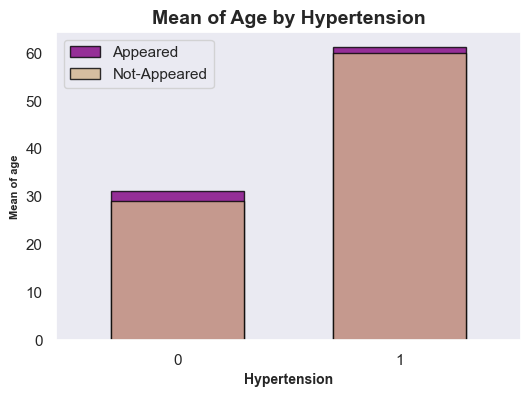

In [99]:
#Does Age affects on attended and attended/non_attended Hypertensive patients?

def myGroPlot(app_df, grpvar, yVar):
    Presence.groupby(["Hypertension"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0 ,width=0.6, color='purple', alpha=0.8)
    non_Presence.groupby(["Hypertension"]).mean()['Age'].plot.bar(edgecolor='black', figsize=(6,4),rot=0,width=0.6, color='tan', alpha=0.8)
    plt.legend(labels=['Appeared','Not-Appeared'])
    plt.title('Mean of Age by Hypertension', fontsize = 14, weight = "bold")
    plt.xlabel('Hypertension', fontsize =10, weight = "bold")
    plt.ylabel('Mean of age', fontsize = 8, weight='bold');
myGroPlot(app_df,'Hypertension','Mean of Age')

Attendance rate increases in the case of patients with chronic diseases in the mean of age in range around from 35 to 60 years old

## Conclusion

 we observe that the number of attended patients was more than non-attended patients with a high age value of children who, definitely, come with their parents. 
However, Baby boys were more attended than baby girls, Older Females show high attendance than males in the age range around from 14 to 85 years old. Finally, there were different factors that affect the presence of patients as shown below:

-The mean relative frequencies of Genders(Males, Females) show almost the same values to each other, which means that the attendance/nonattendance rate doesn`t depend mainly on Gender.

-Patients with Handcap problems show lower attendance.

-However, Baby boys were more attended than baby girls, older patients show low attendance, especially after 60yrs old.

-High attendance related to healthy patients, without chronic diseases (Hypertension and Diabetes), especially Females who don't receive  SMS which means that patients with chronic diseases need more awareness to follow up and SMS-unit needs to revise.

 -AILHAS OCEAN OSCEANICAS DE TRINDADE show the lowest attandance rate where PARQUE INDUSTRIAL show the highest attendance rate.
 
-Chronic diseases increase in patients in age around 40 to above 80 and attendance rate decrease in non-chronic patients.

 Overall, We observe that the attendance rate doesn`t affect mainly by Gender but it decreases in the case of patients with chronic diseases, with
 Handcap problems and who don't receive SMS. 

### limitations
There are some limitations in this study that could be addressed:

-Data do not cover different diseases that could affect on patients' Medical status which will subsequently affect on attendance rate of patients.

-Also, the distance between the patient`s residence and the location of the hospital should take into consideration, in order to study how it affects the attendance rate.

Finally, I recommend that reviews of non-show patients take into account in order to avoid absence in the future.

 